In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
# Load datasets
leakage_data = pd.read_csv("small_leaks/leakage.csv")
nonleakage_data = pd.read_csv("small_leaks/nonleakage.csv")

# Select relevant columns
leakage_data = leakage_data[['Value', 'MeterNumber']]
nonleakage_data = nonleakage_data[['Value', 'MeterNumber']]

# Sort by Meternumber
leakage_data.sort_values(by='MeterNumber', inplace=True)
nonleakage_data.sort_values(by='MeterNumber', inplace=True)

### Extract features via FFT and merge data

In [9]:
from scipy.fft import fft

# Extract features
leakage_data['FFT'] = abs(fft(leakage_data['Value']))
nonleakage_data['FFT'] = abs(fft(nonleakage_data['Value']))

# Merge
leakage_data['Class'] = 1
nonleakage_data['Class'] = 0

combined_data = pd.concat([leakage_data, nonleakage_data])

### Perform and evaluate LDA

In [31]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X = combined_data[['FFT']]
y = combined_data['Class']

# X.head()
# y.head()

lda = LinearDiscriminantAnalysis()
lda.fit(X, y)

0       1
6083    1
6082    1
6081    1
6080    1
Name: Class, dtype: int64

In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
y_pred = lda.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy: 0.8002473510044457
Confusion Matrix:
[[50489  1487]
 [16441 21334]]


LDA obtains a fairly significant accuracy of ~80%. Details can be found in our confusion matrix.

### Extract FFT features

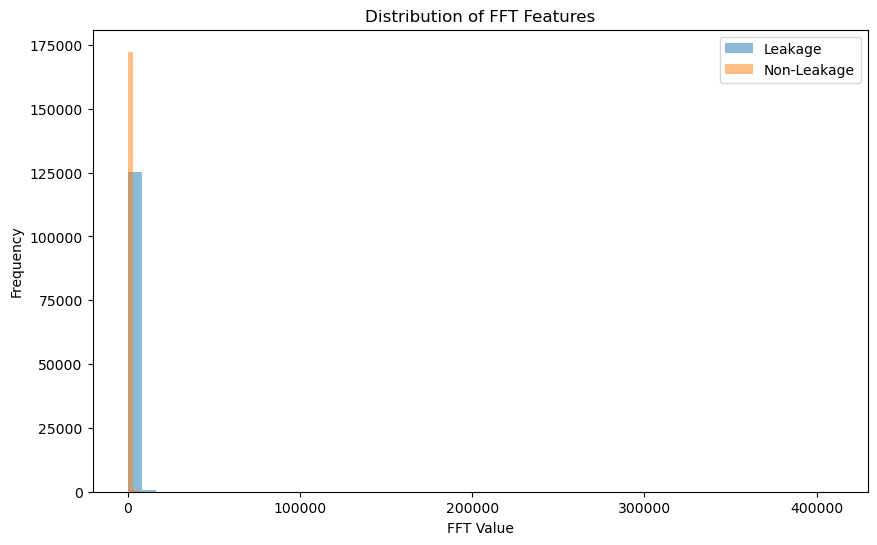

In [20]:
FFT_features = combined_data['FFT']

plt.figure(figsize=(10, 6))
plt.hist(FFT_features[combined_data['Class'] == 1], bins=50, alpha=0.5, label='Leakage')
plt.hist(FFT_features[combined_data['Class'] == 0], bins=50, alpha=0.5, label='Non-Leakage')
plt.xlabel('FFT Value')
plt.ylabel('Frequency')
plt.legend()
plt.title('Distribution of FFT Features')
plt.show()

### Identify important features as determined by LDA coefficients

In [27]:
lda_coefficients = lda.coef_

print(lda_coefficients)

# # Sort features by positive and negative coefficients
# positive_coefficients = lda_coefficients[0]
# negative_coefficients = -lda_coefficients[0]

# # Find the index of the most important (positive and negative) feature
# most_important_positive_feature_index = positive_coefficients.argmax()
# most_important_negative_feature_index = negative_coefficients.argmax()

# # Retrieve the corresponding FFT feature
# most_important_positive_feature = X.columns[most_important_positive_feature_index]
# most_important_negative_feature = X.columns[most_important_negative_feature_index]

[[0.00081206]]
